# CROSS-SELL PREDICTION
#### Solution submitted by: Pratik Nabriya | [LinkedIn](https://www.linkedin.com/in/pratiknabriya/) | [GitHub](https://github.com/pratiknabriya)

## Problem description

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

 For more details visit: https://datahack.analyticsvidhya.com/contest/janatahack-cross-sell-prediction/

# 1. Importing libraries and reading data files 

In [ ]:
# import necessary libraries 

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from tqdm import tqdm
import os

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
# mount google drive 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# reading data from google drive 
my_path = '/content/gdrive/My Drive/JanataHack/Cross_Sell_Prediction_13092020/'
# load train data in pandas dataframe
train_data = pd.read_csv(my_path + 'train.csv')
# load test data in pandas dataframe
test_data = pd.read_csv(my_path + 'test.csv')

In [ ]:
# shape of train and test data 
print(train_data.shape)
print(test_data.shape)

(381109, 12)
(127037, 11)


In [ ]:
# display first few rows of train data 
train_data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [ ]:
# display test data 
test_data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
5,381115,Male,22,1,30.0,1,< 1 Year,No,40207.0,152.0,266
6,381116,Female,51,1,37.0,1,1-2 Year,No,40118.0,26.0,107
7,381117,Male,25,1,41.0,1,< 1 Year,No,23375.0,152.0,232
8,381118,Male,42,1,41.0,0,1-2 Year,Yes,2630.0,26.0,277
9,381119,Female,37,1,12.0,1,1-2 Year,No,27124.0,124.0,133


In [ ]:
# columns info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
# unique rows in each column
train_data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [ ]:
# check if there are any null values in train data 
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
# check if there are any null values in test data
test_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [ ]:
# check for imbalance in data 
train_data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

There is high imbalance in data as expected.

# 2. Exploratory Data Analysis 

## 2.1. Gender 

In [ ]:
# train data
train_data['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [ ]:
print("Males interested in insurance % :", train_data[(train_data['Gender'] == 'Male') &  
    (train_data['Response'] == 1)]['id'].count()*100/train_data[train_data['Gender'] == 'Male']['id'].count())

print("Females interested in insurance % :", train_data[(train_data['Gender'] == 'Female') &  
    (train_data['Response'] == 1)]['id'].count()*100/train_data[train_data['Gender'] == 'Female']['id'].count())

Males interested in insurance % : 13.841107482689518
Females interested in insurance % : 10.390241115301109


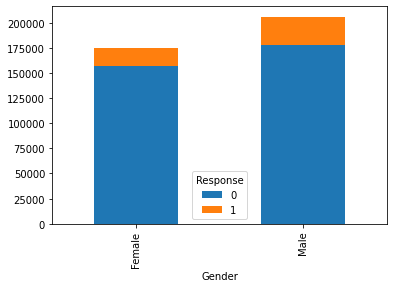

In [ ]:
train_data.groupby(['Gender', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

In [ ]:
# test data
test_data['Gender'].value_counts()

Male      68236
Female    58801
Name: Gender, dtype: int64

## 2.2 Age

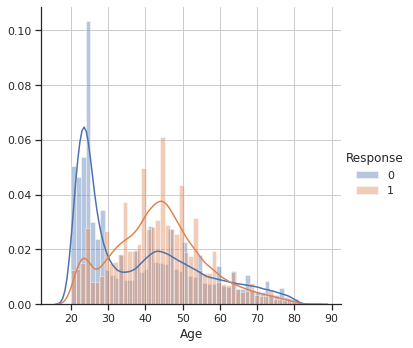

In [ ]:
# how does age influence response 

sns.FacetGrid(data = train_data, hue = 'Response', height = 5).map(sns.distplot, 'Age').add_legend()
plt.grid()
plt.show()

People in middle age group (i.e. age > 30) are more likely to take vehicle insurance as compared to the people in the young age group(i.e. age <30) . 
So age is a potential feature. 

In [ ]:
train_data['Age'].value_counts()

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

We can also consider this feature as categorical feature and observe the result. 

## 2.3. Driving License 

In [ ]:
# train data 
train_data['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [ ]:
train_data.groupby(['Driving_License', 'Response']).size().unstack()

Response,0,1
Driving_License,,
0,771,41
1,333628,46669


In [ ]:
# test data 
test_data['Driving_License'].value_counts()

1    126800
0       237
Name: Driving_License, dtype: int64

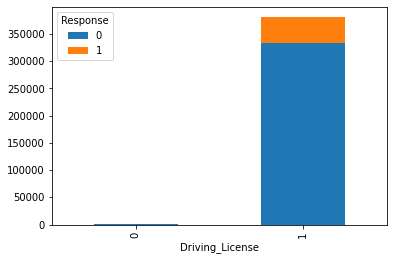

In [ ]:
train_data.groupby(['Driving_License', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)

Over 99.5% of the Customer have driving license for both train and test data.  

## 2.4. Region Code

In [ ]:
# train data 
train_data['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [ ]:
# test data 
test_data['Region_Code'].value_counts()

28.0    35522
8.0     11023
46.0     6608
41.0     6137
15.0     4442
30.0     4085
29.0     3778
50.0     3414
3.0      3098
11.0     3096
36.0     2899
33.0     2653
47.0     2506
35.0     2367
6.0      2071
45.0     1938
37.0     1842
18.0     1750
48.0     1593
14.0     1571
39.0     1494
10.0     1473
21.0     1405
2.0      1360
13.0     1360
12.0     1037
7.0      1034
9.0       983
32.0      958
27.0      888
26.0      874
43.0      869
25.0      849
24.0      848
17.0      838
16.0      720
0.0       678
31.0      675
38.0      651
23.0      636
20.0      593
4.0       578
49.0      556
34.0      526
19.0      524
22.0      420
5.0       419
40.0      413
1.0       355
44.0      256
42.0      196
52.0       90
51.0       88
Name: Region_Code, dtype: int64

Consequnetly we have to either do response coding or one hot encoding. Preferably we'll do response coding.

## 2.5. Previously insured 

In [ ]:
# train data 
train_data.groupby(['Previously_Insured', 'Response']).size().unstack()

Response,0,1
Previously_Insured,,
0,159929,46552
1,174470,158


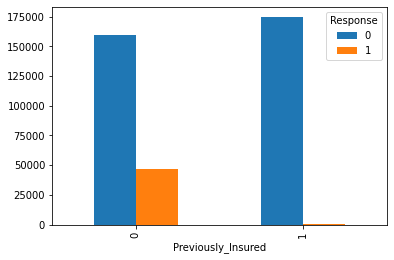

In [ ]:
train_data.groupby(['Previously_Insured', 'Response']).size().unstack().plot(kind = 'bar')

There are only 158 such peope who have previously got insured and want to insure again! 

Among the customers who already have their vehicle insured, almost all of them Responded NO. 

Among the customers who so not have have their vehicle insured, nearly 30% would want to get insured. 

So clearly, this is a good distinctive feature for prediction. 

## 2.6. Vehicle Age

In [ ]:
# train data 
train_data.groupby(['Vehicle_Age', 'Response']).size().unstack()

Response,0,1
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


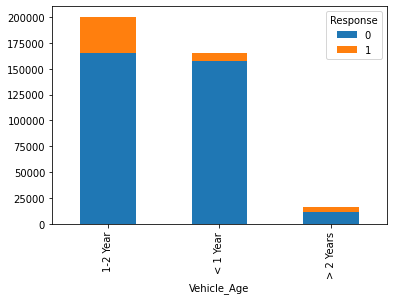

In [ ]:
train_data.groupby(['Vehicle_Age','Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

If the age is less than 1 year, Customers are most likely to respond NO. 


## 2.7. Vehicle Damage

In [ ]:
train_data.groupby(['Vehicle_Damage', 'Response']).size().unstack()

Response,0,1
Vehicle_Damage,,
No,187714,982
Yes,146685,45728


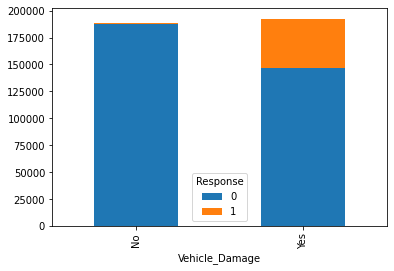

In [ ]:
train_data.groupby(['Vehicle_Damage', 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

Customers whose vehicle is NOT damaged in past are almost certainly going to respond NO for vehicle insurance. 

So, like 'Previously_Insured', 'Vehicle_Damage' in past turns out to be an excellent feature! 

## 2.8. Annual_Premium

In [ ]:
train_data['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [ ]:
# 90 - 100 percentile values
np.percentile(train_data['Annual_Premium'], np.arange(90, 101))

array([ 48431.  ,  49412.28,  50505.  ,  51774.  ,  53287.  ,  55176.  ,
        57564.68,  60680.  ,  65380.84,  72963.  , 540165.  ])

In [ ]:
# 99.9 percentile
np.percentile(train_data['Annual_Premium'], 99.9)

115554.0

Clearly, 99 percentile is at 72963 and 99.9 percentile is at 115554.

In [ ]:
# Test data 
# 90 - 100 percentile values 
np.percentile(test_data['Annual_Premium'], np.arange(90, 101))

array([ 48491.8 ,  49457.  ,  50548.12,  51818.  ,  53307.84,  55218.8 ,
        57503.56,  60603.  ,  65228.96,  72739.  , 472042.  ])

In [ ]:
# Test data
# 99.9 percentile
np.percentile(test_data['Annual_Premium'], 99.99)

238893.86319996766

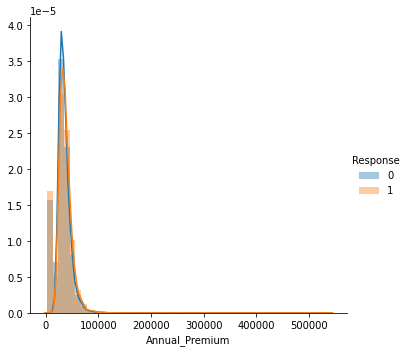

In [ ]:
# how does annual premium influence response

sns.FacetGrid(data = train_data, hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

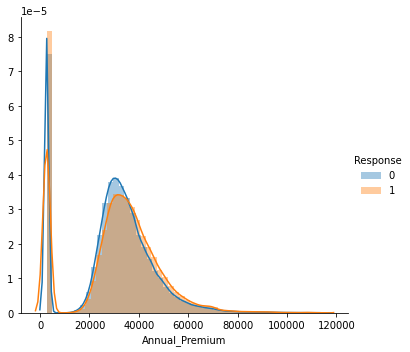

In [ ]:
# Consider only upto 99.9 percentile 

sns.FacetGrid(data = train_data[train_data['Annual_Premium'] < np.percentile(train_data['Annual_Premium'], 99.9)], 
              hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

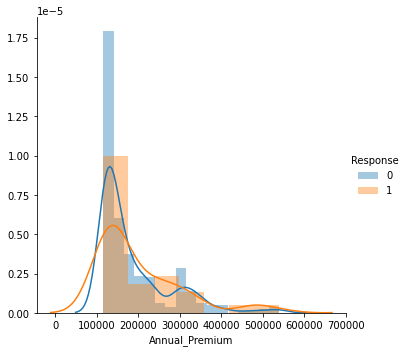

In [ ]:
# Beyond 99.9 percentile 

sns.FacetGrid(data = train_data[train_data['Annual_Premium'] >= np.percentile(train_data['Annual_Premium'], 99.9)], 
              hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.show()

There is no clear distinction here. So we cannot say anything conclusive from this univariate feature analysis. Due to presence of outlier values, we may need to scale this featue to minimize the effect of outlier. 

## 2.9. Policy_Sales_Channel

In [ ]:
train_data['Policy_Sales_Channel'].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

Too much variability! We will handle this feature by response encoding or One hot encoding

In [ ]:
train_data['Policy_Sales_Channel'].value_counts().values

array([134784,  79700,  73995,  21779,  10661,   9930,   6684,   5993,
         3885,   2893,   1865,   1848,   1598,   1515,   1410,   1264,
         1234,   1203,   1074,   1055,   1026,    888,    843,    783,
          769,    750,    631,    622,    607,    579,    523,    523,
          517,    509,    492,    422,    332,    312,    264,    222,
          185,    184,    175,    174,    169,    167,    158,    154,
          152,    148,    143,    137,    132,    127,    124,    121,
          110,    107,    104,    103,    101,    101,    100,     89,
           85,     77,     75,     72,     68,     65,     64,     63,
           62,     59,     54,     52,     52,     51,     48,     47,
           46,     44,     38,     34,     32,     28,     27,     26,
           24,     23,     23,     22,     21,     21,     20,     19,
           18,     18,     16,     16,     16,     16,     15,     14,
           14,     14,     14,     13,     13,     12,     11,     10,
      

## 2.10. Vintage

In [ ]:
train_data.Age.describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

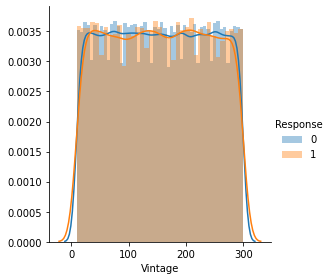

In [ ]:
sns.FacetGrid(data = train_data, hue = 'Response', height = 4).map(sns.distplot, 'Vintage').add_legend()
plt.show()

There is a very high overlap. Clearly, this feature alone is very bad for perdiction. 

# 3. Data Cleaning and Pre-processing

In [ ]:
train_data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 3.1. Gender


In [ ]:
# train data
X_train_gender = train_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
X_train_gender = X_train_gender.values.reshape(-1, 1)

# test data
X_test_gender = test_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
X_test_gender = X_test_gender.values.reshape(-1, 1)

print(X_train_gender.shape)
print(X_test_gender.shape)

(381109, 1)
(127037, 1)


## 3.2. Age


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data['Age'].values.reshape(-1, 1))
X_train_age = scaler.transform(train_data['Age'].values.reshape(-1, 1))
X_test_age = scaler.transform(test_data['Age'].values.reshape(-1, 1))

print(X_train_age.shape)
print(X_test_age.shape)

(381109, 1)
(127037, 1)


In [ ]:
# no scaling

X_train_age_n = train_data['Age'].values.reshape(-1, 1)
X_test_age_n = test_data['Age'].values.reshape(-1, 1)

print(X_train_age_n.shape)
print(X_test_age_n.shape)

(381109, 1)
(127037, 1)


## Feature engineering: new categorical feature for Age

In [ ]:
# train data
X_train_age_cat = train_data['Age'].apply(lambda x: 1 if x >= 30 else 0)
X_train_age_cat = X_train_age_cat.values.reshape(-1, 1)

# test data
X_test_age_cat = test_data['Age'].apply(lambda x: 1 if x >= 30 else 0)
X_test_age_cat = X_test_age_cat.values.reshape(-1, 1)

print(X_train_age_cat.shape)
print(X_test_age_cat.shape)

(381109, 1)
(127037, 1)


## 3.3 Driving License

In [ ]:
X_train_license = train_data['Driving_License'].values.reshape(-1, 1)
X_test_license = test_data['Driving_License'].values.reshape(-1, 1)

print(X_train_license.shape)
print(X_test_license.shape)

(381109, 1)
(127037, 1)


## 3.4 Region Code

In [ ]:
# one-hot encoding 'Region code'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_data['Region_Code'].values.reshape(-1, 1))

X_train_region_code = encoder.transform(train_data['Region_Code'].values.reshape(-1, 1))
X_test_region_code = encoder.transform(test_data['Region_Code'].values.reshape(-1, 1))

print(X_train_region_code.shape)
print(X_test_region_code.shape)

(381109, 53)
(127037, 53)


Note: In response coding, when we calculate the probability of a feature value belonging to a particular class.

In [ ]:
# response encoding

def get_feat_dict(feature):
    value_count = train_data[feature].value_counts() # value counts of each feature
    my_dict = dict()  # initialize a dictionary
    for i, denominator in value_count.items():
        class_count = train_data[(train_data['Response'] == 1) & (train_data[feature] == i)]
        my_dict[i] = round((class_count.shape[0]/denominator), 6)
    return my_dict

In [ ]:
region_code_dict = get_feat_dict('Region_Code')
region_code_dict

{0.0: 0.086096,
 1.0: 0.108135,
 2.0: 0.071075,
 3.0: 0.127662,
 4.0: 0.158245,
 5.0: 0.115715,
 6.0: 0.069904,
 7.0: 0.131747,
 8.0: 0.096142,
 9.0: 0.081587,
 10.0: 0.060128,
 11.0: 0.11276,
 12.0: 0.097561,
 13.0: 0.090188,
 14.0: 0.090209,
 15.0: 0.071987,
 16.0: 0.066766,
 17.0: 0.07031,
 18.0: 0.131574,
 19.0: 0.162866,
 20.0: 0.115245,
 21.0: 0.071027,
 22.0: 0.063407,
 23.0: 0.153061,
 24.0: 0.141615,
 25.0: 0.042749,
 26.0: 0.072284,
 27.0: 0.074035,
 28.0: 0.187163,
 29.0: 0.123362,
 30.0: 0.073825,
 31.0: 0.10051,
 32.0: 0.085755,
 33.0: 0.099294,
 34.0: 0.075721,
 35.0: 0.124604,
 36.0: 0.079914,
 37.0: 0.079258,
 38.0: 0.192004,
 39.0: 0.1236,
 40.0: 0.118147,
 41.0: 0.121776,
 42.0: 0.07445,
 43.0: 0.092459,
 44.0: 0.040842,
 45.0: 0.109723,
 46.0: 0.102891,
 47.0: 0.087682,
 48.0: 0.101901,
 49.0: 0.074782,
 50.0: 0.062677,
 51.0: 0.153005,
 52.0: 0.123596}

In [ ]:
# test 
pkn = train_data['Region_Code'].copy()
pkn = pkn.apply(lambda x: region_code_dict[x]) 
pkn

0         0.187163
1         0.127662
2         0.187163
3         0.112760
4         0.121776
            ...   
381104    0.072284
381105    0.079258
381106    0.073825
381107    0.090209
381108    0.123362
Name: Region_Code, Length: 381109, dtype: float64

In [ ]:
# train data
X_train_region_code_resp = train_data['Region_Code'].apply(lambda x: region_code_dict[x])
X_train_region_code_resp = X_train_region_code_resp.values.reshape(-1, 1)

# test data
X_test_region_code_resp = test_data['Region_Code'].apply(lambda x: region_code_dict[x] if x in region_code_dict.keys() 
                                                                                       else np.median(list(region_code_dict.values())))
X_test_region_code_resp = X_test_region_code_resp.values.reshape(-1, 1)

print(X_train_region_code_resp.shape)
print(X_test_region_code_resp.shape)

(381109, 1)
(127037, 1)


## 3.5 Previously Insured

In [ ]:
X_train_prev_ins = train_data['Previously_Insured'].values.reshape(-1, 1)
X_test_prev_ins = test_data['Previously_Insured'].values.reshape(-1, 1)

print(X_train_prev_ins.shape)
print(X_test_prev_ins.shape)

(381109, 1)
(127037, 1)


## 3.6 Vehicle Age

In [ ]:
# one-hot encoding 'Vehicle Age'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_data['Vehicle_Age'].values.reshape(-1, 1))

X_train_vehicle_age = encoder.transform(train_data['Vehicle_Age'].values.reshape(-1, 1))
X_test_vehicle_age = encoder.transform(test_data['Vehicle_Age'].values.reshape(-1, 1))

print(X_train_vehicle_age.shape)
print(X_test_vehicle_age.shape)

(381109, 3)
(127037, 3)


#### label encoding 'Vehicle Age'

In [ ]:
X_train_vehicle_age_n = train_data['Vehicle_Age'].replace({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})
X_train_vehicle_age_n = X_train_vehicle_age_n.values.reshape(-1, 1)

X_test_vehicle_age_n = test_data['Vehicle_Age'].replace({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})
X_test_vehicle_age_n = X_test_vehicle_age_n.values.reshape(-1, 1)

#### Response coding

In [ ]:
vehicle_age_dict = get_feat_dict('Vehicle_Age')
vehicle_age_dict

{'1-2 Year': 0.173755, '< 1 Year': 0.043705, '> 2 Years': 0.293746}

In [ ]:
X_train_vehicle_age_resp = train_data['Vehicle_Age'].apply(lambda x: vehicle_age_dict[x])
X_train_vehicle_age_resp = X_train_vehicle_age_resp.values.reshape(-1, 1)

X_test_vehicle_age_resp = test_data['Vehicle_Age'].apply(lambda x: vehicle_age_dict[x])
X_test_vehicle_age_resp = X_test_vehicle_age_resp.values.reshape(-1, 1)

print(X_train_vehicle_age_resp.shape)
print(X_test_vehicle_age_resp.shape)

(381109, 1)
(127037, 1)


## 3.7 Vehicle Damage

In [ ]:
# train data
X_train_damage = train_data['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train_damage = X_train_damage.values.reshape(-1, 1)

# test data
X_test_damage = test_data['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)
X_test_damage = X_test_damage.values.reshape(-1, 1)

print(X_train_damage.shape)
print(X_test_damage.shape)

(381109, 1)
(127037, 1)


## 3.8 Annual Premium

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data['Annual_Premium'].values.reshape(-1, 1))
X_train_premium = scaler.transform(train_data['Annual_Premium'].values.reshape(-1, 1))
X_test_premium = scaler.transform(test_data['Annual_Premium'].values.reshape(-1, 1))

print(X_train_premium.shape)
print(X_test_premium.shape)

(381109, 1)
(127037, 1)


In [ ]:
# no scale

X_train_premium_n = train_data['Annual_Premium'].values.reshape(-1, 1)
X_test_premium_n =  test_data['Annual_Premium'].values.reshape(-1, 1)

print(X_train_premium_n.shape)
print(X_test_premium_n.shape)

(381109, 1)
(127037, 1)


## 3.9 Policy Sales Channel

In [ ]:
# one-hot encoding 'Policy_Channel'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(train_data['Policy_Sales_Channel'].values.reshape(-1, 1))

X_train_sales_chnl = encoder.transform(train_data['Policy_Sales_Channel'].values.reshape(-1, 1))
X_test_sales_chnl = encoder.transform(test_data['Policy_Sales_Channel'].values.reshape(-1, 1))

print(X_train_sales_chnl.shape)
print(X_test_sales_chnl.shape)

(381109, 155)
(127037, 155)


#### Response encoding

In [ ]:
sales_chnl_dict = get_feat_dict('Policy_Sales_Channel')
sales_chnl_dict

{1.0: 0.032588,
 2.0: 0.25,
 3.0: 0.304015,
 4.0: 0.200393,
 6.0: 0.0,
 7.0: 0.113892,
 8.0: 0.082508,
 9.0: 0.100592,
 10.0: 0.189394,
 11.0: 0.089776,
 12.0: 0.168582,
 13.0: 0.147453,
 14.0: 0.101286,
 15.0: 0.087838,
 16.0: 0.086042,
 17.0: 0.1875,
 18.0: 0.035928,
 19.0: 0.085586,
 20.0: 0.111111,
 21.0: 0.081081,
 22.0: 0.054217,
 23.0: 0.137441,
 24.0: 0.132,
 25.0: 0.199675,
 26.0: 0.199385,
 27.0: 0.333333,
 28.0: 0.333333,
 29.0: 0.125741,
 30.0: 0.110638,
 31.0: 0.253566,
 32.0: 0.095238,
 33.0: 0.0,
 34.0: 0.0,
 35.0: 0.133333,
 36.0: 0.326923,
 37.0: 0.098684,
 38.0: 0.0,
 39.0: 0.1,
 40.0: 0.133333,
 41.0: 0.0,
 42.0: 0.19697,
 43.0: 1.0,
 44.0: 0.19802,
 45.0: 0.148936,
 46.0: 0.0,
 47.0: 0.126984,
 48.0: 0.05,
 49.0: 0.142857,
 50.0: 0.0,
 51.0: 0.083333,
 52.0: 0.109005,
 53.0: 0.21875,
 54.0: 0.16,
 55.0: 0.149525,
 56.0: 0.184615,
 57.0: 0.2,
 58.0: 0.111111,
 59.0: 0.19685,
 60.0: 0.102515,
 61.0: 0.096718,
 62.0: 0.166667,
 63.0: 0.052632,
 64.0: 0.05618,
 65.0: 0.

In [ ]:
# test 
pkn = train_data['Policy_Sales_Channel'].copy()
pkn = pkn.apply(lambda x: sales_chnl_dict[x]) 
pkn

0         0.199385
1         0.199385
2         0.199385
3         0.028624
4         0.028624
            ...   
381104    0.199385
381105    0.028624
381106    0.021810
381107    0.189148
381108    0.199385
Name: Policy_Sales_Channel, Length: 381109, dtype: float64

In [ ]:
X_train_sales_chnl_resp = train_data['Policy_Sales_Channel'].apply(lambda x: sales_chnl_dict[x])
X_train_sales_chnl_resp = X_train_sales_chnl_resp.values.reshape(-1, 1)

X_test_sales_chnl_resp = test_data['Policy_Sales_Channel'].apply(lambda x: sales_chnl_dict[x] if x in sales_chnl_dict.keys() 
                                                                                              else np.median(list(sales_chnl_dict.values())))
X_test_sales_chnl_resp = X_test_sales_chnl_resp.values.reshape(-1, 1)

print(X_train_sales_chnl_resp.shape)
print(X_test_sales_chnl_resp.shape)

(381109, 1)
(127037, 1)


## 3.10 Vintage

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_data['Vintage'].values.reshape(-1, 1))
X_train_vintage = scaler.transform(train_data['Vintage'].values.reshape(-1, 1))
X_test_vintage = scaler.transform(test_data['Vintage'].values.reshape(-1, 1))

print(X_train_vintage.shape)
print(X_test_vintage.shape)

(381109, 1)
(127037, 1)


In [ ]:
# no scaling

X_train_vintage_n = train_data['Vintage'].values.reshape(-1, 1)
X_test_vintage_n =  test_data['Vintage'].values.reshape(-1, 1)

print(X_train_vintage_n.shape)
print(X_test_vintage_n.shape)

(381109, 1)
(127037, 1)


## 4. Stacking all the features together 

### Set 1: Label encoded + One hot encoded categorical features + scaled numerical features

In [ ]:
y_train = train_data['Response'].values

In [ ]:
from scipy.sparse import hstack

X_train_ohe = hstack((X_train_gender, X_train_age, X_train_license, X_train_region_code, X_train_prev_ins, 
                       X_train_vehicle_age, X_train_damage, X_train_premium, X_train_sales_chnl, X_train_vintage))

X_test_ohe = hstack((X_test_gender, X_test_age, X_test_license, X_test_region_code, X_test_prev_ins, 
                      X_test_vehicle_age, X_test_damage, X_test_premium, X_test_sales_chnl, X_test_vintage)) 

print("train data shape:", (X_train_ohe.shape, y_train.shape))
print("test data shape:", X_test_ohe.shape)

train data shape: ((381109, 218), (381109,))
test data shape: (127037, 218)


### Set 2: Label encoded + Response encoded categorical features + numerical features

In [ ]:
X_train_r = np.hstack((X_train_gender, X_train_age_n, X_train_age_cat, X_train_license, X_train_region_code_resp, X_train_prev_ins, 
                       X_train_vehicle_age_resp, X_train_damage, X_train_premium_n, X_train_sales_chnl_resp, X_train_vintage_n))

X_test_r = np.hstack((X_test_gender, X_test_age_n, X_test_age_cat, X_test_license, X_test_region_code_resp, X_test_prev_ins, 
                      X_test_vehicle_age_resp, X_test_damage, X_test_premium_n, X_test_sales_chnl_resp, X_test_vintage_n)) 

print("train data shape:", (X_train_r.shape, y_train.shape))
print("test data shape:", X_test_r.shape)

train data shape: ((381109, 10), (381109,))
test data shape: (127037, 10)


# 5. Building Machine Learning Models
### (With Set 1 features)

## 5.1 Logistic Regression using SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

sgd = SGDClassifier(loss = 'log', class_weight = 'balanced') # default penalty is L2 
parameter = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

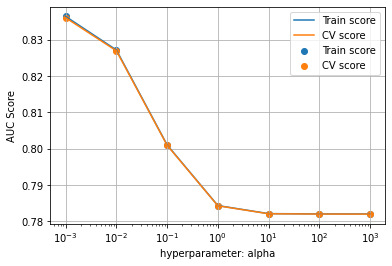

In [ ]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

#### With only L1 regularization

In [ ]:
sgd = SGDClassifier(loss = 'log', class_weight = 'balanced',  l1_ratio = 1 ) 
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True, l1_ratio=1,
                                     learning_rate='optimal', loss='log',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

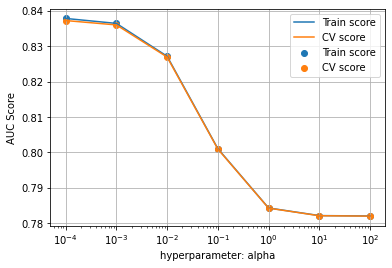

In [ ]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

## 5.2 Linear SVM Classifier using SGD

In [ ]:
sgd = SGDClassifier(loss = 'hinge', class_weight = 'balanced') 
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scori

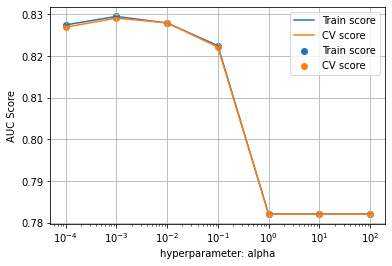

In [ ]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

### Logistic Regression with default parameters

In [ ]:
from sklearn.metrics import roc_auc_score

sgd_clf = SGDClassifier(loss = 'log', class_weight= 'balanced', random_state = 42) # default penalty is L2
sgd_clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(sgd_clf, method = "sigmoid")
sig_clf.fit(X_train, y_train)

y_pred_train = sig_clf.predict_proba(X_train)
y_pred_test = sig_clf.predict_proba(X_test)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.8384389356104578


In [ ]:
sgd_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
sgd_df.head()

,id,Response
0,381110,0.005470
1,381111,0.320437
2,381112,0.279726
3,381113,0.113913
4,381114,0.003850


In [ ]:
sgd_df.to_csv(my_path + 'logistic_sgd_l2_10e-4.csv', index = False)

#### Without Region code, Policy Sales Channel and Driving license features (Experimental set)

In [ ]:
from scipy.sparse import hstack

X_train1 = hstack((X_train_gender, X_train_age, X_train_prev_ins, 
                  X_train_vehicle_age, X_train_damage, X_train_premium, X_train_vintage))

X_test1 = hstack((X_test_gender, X_test_age, X_test_prev_ins, 
                  X_test_vehicle_age, X_test_damage, X_test_premium,X_test_vintage)) 

print(X_train1.shape, y_train.shape) 
print(X_test1.shape)        

(381109, 9) (381109,)
(127037, 9)


In [ ]:
sgd = SGDClassifier(loss = 'log', class_weight = 'balanced', random_state = 42) # default penalty is L2 
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train1, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True, l1_ratio=1,
                                     learning_rate='optimal', loss='log',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=42, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

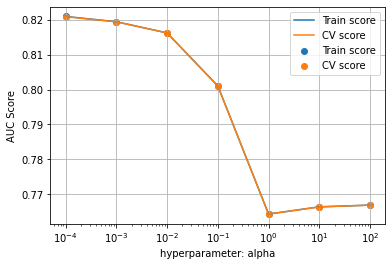

In [ ]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

## 5.3. Multinomial Naive Bayes 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mul_NB = MultinomialNB() 
parameters = {'alpha' :[0.0001,0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(mul_NB, parameters, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

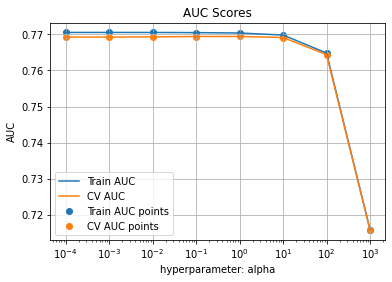

In [ ]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
plt.plot(parameters['alpha'], train_auc, label = 'Train AUC')
plt.plot(parameters['alpha'], cv_auc, label = 'CV AUC')

plt.scatter(parameters['alpha'], train_auc, label = 'Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label = 'CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC")
plt.title("AUC Scores")
plt.grid()
plt.show()

## 5.4. Baseline RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(rfc, method = "sigmoid")
sig_clf.fit(X_train, y_train)

y_pred_train = sig_clf.predict_proba(X_train)
y_pred_test = sig_clf.predict_proba(X_test)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

In [ ]:
print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.9999986429704083


As we can see, this is highly overfitting. We need to hyperparameter tuining to reduce overfitting.

In [ ]:
rfc_baseline_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
rfc_baseline_df.head()

,id,Response
0,381110,0.053837
1,381111,0.318576
2,381112,0.090398
3,381113,0.220024
4,381114,0.053837


In [ ]:
rfc_baseline_df.to_csv(my_path + 'rfc_baseline_ohe.csv', index = False)

### Random Forest (without hyperparameter tuning)

#### With some random hyperparameter values from past experience to reduce overfitting.

In [ ]:
rfc = RandomForestClassifier(n_estimators = 250, max_depth = 15, random_state = 101, n_jobs = -1) 
rfc.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(rfc, method = "sigmoid")
sig_clf.fit(X_train, y_train)

y_pred_train = sig_clf.predict_proba(X_train)
y_pred_test = sig_clf.predict_proba(X_test)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.8706699397824769


In [ ]:
rfc_notuning_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
rfc_notuning_df.head()

,id,Response
0,381110,0.013672
1,381111,0.304592
2,381112,0.288714
3,381113,0.040469
4,381114,0.013856


In [ ]:
rfc_notuning_df.to_csv(my_path + 'rfc_notuning_ohe.csv', index = False)

## 5.5. XGBoost Classifier (without hyperparameter tuning)

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators = 150, max_depth = 11, colsample_bytree = 0.6, class_ n_jobs = -1, random_state = 21)
xgb.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(xgb, method = "sigmoid")
sig_clf.fit(X_train, y_train)

y_pred_train = sig_clf.predict_proba(X_train)
y_pred_test = sig_clf.predict_proba(X_test)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.8890019875244968


There values of hypermeter are from my previous experience. We still need to do hyperparameter tuning for a better optimal solution. 

In [ ]:
xgb_notuning_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
xgb_notuning_df.head()

,id,Response
0,381110,0.026612
1,381111,0.279585
2,381112,0.246641
3,381113,0.075442
4,381114,0.026452


In [ ]:
xgb_notuning_df.to_csv(my_path + 'xgb_notuning_ohe.csv', index = False)

# 6. Building Machine Learning Models
### With Set 2 features

In [ ]:
# roc plot 
from sklearn.metrics import auc

def plot_ROC(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize = (5, 5))
    plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.3f)' % roc_auc, alpha = 0.7)
    plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--', alpha = 0.5)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.grid()
    plt.xlabel('False Positive Rate', fontsize = 12)
    plt.ylabel('True Positive Rate', fontsize = 12)
    plt.title('Receiver Operating Characteristic', fontsize = 16)
    plt.legend(loc = "lower right", fontsize = 12)
    plt.show()

## 6.1 LightGBM (without hyperparameter tuning)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV

LGB_model = LGBMClassifier(max_depth = 8, n_estimators = 300, reg_lambda = 1.2, reg_alpha = 1.2, min_child_weight = 1, verbose  = 1,
                          learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.6, eval_metric = 'auc', is_higher_better = 1, plot = True)
LGB_model.fit(X_train_r, y_train)
sig_clf = CalibratedClassifierCV(LGB_model, method = "sigmoid")
sig_clf.fit(X_train_r, y_train)

y_pred_train = sig_clf.predict_proba(X_train_r)
y_pred_test = sig_clf.predict_proba(X_test_r)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.8685927288915909


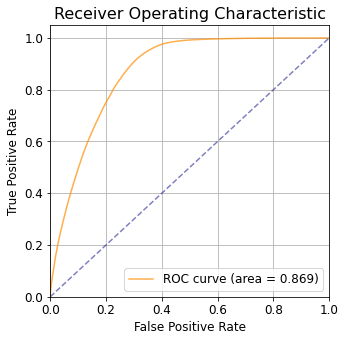

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train[:, 1])
plot_ROC(fpr, tpr)

In [ ]:
lightgbm_notuning_df = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
lightgbm_notuning_df.head()

,id,Response
0,381110,0.026455
1,381111,0.314695
2,381112,0.260928
3,381113,0.076663
4,381114,0.025671


In [ ]:
lightgbm_notuning_df.to_csv(my_path + 'lightgbm_notuning_resp_feats.csv', index = False)

## 6.2 XGBoost Classifier (without hyperparameter tuning)

In [ ]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(n_estimators = 150, max_depth = 11, colsample_bytree = 0.6, n_jobs = -1, random_state = 21)
xgb.fit(X_train_r, y_train)
sig_clf = CalibratedClassifierCV(xgb, method = "sigmoid")
sig_clf.fit(X_train_r, y_train)

y_pred_train = sig_clf.predict_proba(X_train_r)
y_pred_test = sig_clf.predict_proba(X_test_r)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.9047303386039507


In [ ]:
xgb_notuning_resp_feats = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
xgb_notuning_resp_feats.head()

,id,Response
0,381110,0.028510
1,381111,0.433677
2,381112,0.274555
3,381113,0.071792
4,381114,0.027961


In [ ]:
xgb_notuning_resp_feats.to_csv(my_path + 'xgb_notuning_resp_feats.csv', index = False)

In [ ]:
xgb_notuning_nocal_resp.to_csv(my_path + 'xgb_notuning_nocal_resp.csv', index = False)

## 6.3 XGBoost Classifier (with hyperparameter tuning)

In [ ]:
'''
XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, 
              objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, 
              gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, 
              colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
              base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
'''

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_jobs = -1, random_state = 21)
params = {'n_estimators': [50, 100, 150, 250, 500], 
          'max_depth': [3, 5, 7, 11, 15]}
clf = GridSearchCV(xgb, params, scoring = 'roc_auc', cv = 3, return_train_score = True, n_jobs = -1)
clf.fit(X_train_r, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=21, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 11, 15],
                         'n_estimators': [50, 100, 150, 250, 500]},
             pre_dispatch='2*n_jobs', refit=True, re

In [ ]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=21,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

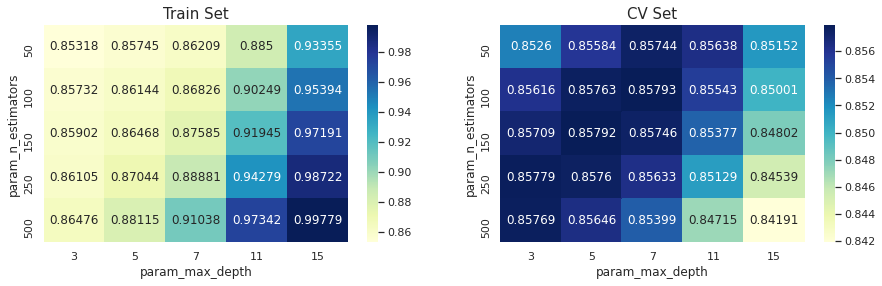

In [ ]:
# plot the performance of model both on train data and cross validation data for each hyper parameter using a Seaborn Heatmap
# reference -> https://kavisekhon.com/Grid%20Search.html

sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(
            ['param_n_estimators', 'param_max_depth']).max().unstack()[
            ['mean_train_score', 'mean_test_score']]

fig, ax = plt.subplots(1,2, figsize = (15, 4))
sns.heatmap(max_scores.mean_train_score, annot = True, ax = ax[0], fmt = '.5g', cmap = "YlGnBu")
sns.heatmap(max_scores.mean_test_score, annot = True, ax = ax[1], fmt ='.5g', cmap = "YlGnBu")

ax[0].set_title('Train Set', fontsize = 15)
ax[1].set_title('CV Set', fontsize = 15)
plt.show()

#### n = 100, max_depth = 7
Let's tune subsample and colsample by tree

In [ ]:
xgb = XGBClassifier(n_estimators = 100, max_depth = 7, n_jobs = -1, random_state = 21)
params = {'subsample': [0.5, 1], 
          'colsample_bytree': [0.4, 0.6, 0.8, 1]}
clf = GridSearchCV(xgb, params, scoring = 'roc_auc', cv = 3, return_train_score = True, n_jobs = -1)
clf.fit(X_train_r, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=7, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=21, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8, 1],
                         'subsample': [0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [ ]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=21,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

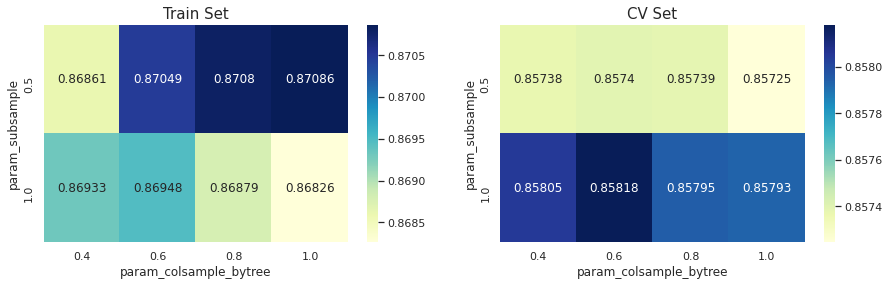

In [ ]:
max_scores = pd.DataFrame(clf.cv_results_).groupby(
            ['param_subsample', 'param_colsample_bytree']).max().unstack()[
            ['mean_train_score', 'mean_test_score']]

fig, ax = plt.subplots(1,2, figsize = (15, 4))
sns.heatmap(max_scores.mean_train_score, annot = True, ax = ax[0], fmt = '.5g', cmap = "YlGnBu")
sns.heatmap(max_scores.mean_test_score, annot = True, ax = ax[1], fmt ='.5g', cmap = "YlGnBu")

ax[0].set_title('Train Set', fontsize = 15)
ax[1].set_title('CV Set', fontsize = 15)
plt.show()

#### Optimal hyperparams: n_estimators = 100, max_depth = 7, subsample = 1, colsample_bytree = 0.6


In [ ]:
xgb = XGBClassifier(n_estimators = 100, max_depth = 7, subsample = 1, colsample_bytree = 0.6, n_jobs = -1, random_state = 21)
xgb.fit(X_train_r, y_train)
sig_clf = CalibratedClassifierCV(xgb, method = "sigmoid")
sig_clf.fit(X_train_r, y_train)

y_pred_train = sig_clf.predict_proba(X_train_r)
y_pred_test = sig_clf.predict_proba(X_test_r)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.866605555071906


In [ ]:
xgb_new100_7point6_cal1 = pd.DataFrame(data = {'id':test_data['id'], 'Response':y_pred_test[:, 1]})
xgb_new100_7point6_cal1.head()

,id,Response
0,381110,0.020910
1,381111,0.273738
2,381112,0.281243
3,381113,0.022044
4,381114,0.020899


In [ ]:
xgb_new100_7point6_cal.to_csv(my_path + 'xgb_new100_7point6_cal1.csv', index = False)